<a href="https://colab.research.google.com/github/everestso/47.53.59/blob/master/gcloudNatality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### !pip install --upgrade google-cloud-bigquery
## Caused Error

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

#ensure the file is accessible
!ls /content/gdrive/'My Drive'/'csuf'/'projects'/'GCP'

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/csuf/projects/GCP/c264s20-557a598add94.json"

#ensure the path is set correctly
!echo $GOOGLE_APPLICATION_CREDENTIALS

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
c264s20-557a598add94.json  GCP.BigData.ML.Wk1Links.gdoc
GCP.BigData.ML.gdoc	   GCP.CoreInfrastructure.gdoc
GCP.BigData.ML.Lab2.gdoc   GCP.ML.Special.gdoc
GCP.BigData.ML.Lab3.gdoc   GCP.Notes.gdoc
GCP.BigData.ML.Lab4.gdoc   public_datasets_one_pager.pdf
/content/gdrive/My Drive/csuf/projects/GCP/c264s20-557a598add94.json


In [5]:
from google.cloud import bigquery

client = bigquery.Client()

In [6]:
sql = """
  SELECT
    plurality,
    COUNT(1) AS count,
    year
  FROM
    `bigquery-public-data.samples.natality`
  WHERE
    NOT IS_NAN(plurality) AND plurality > 1
  GROUP BY
    plurality, year
  ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()

,plurality,count,year
0,2,139209,2007
1,2,138866,2008
2,2,137239,2006
3,2,133285,2005
4,2,132344,2004


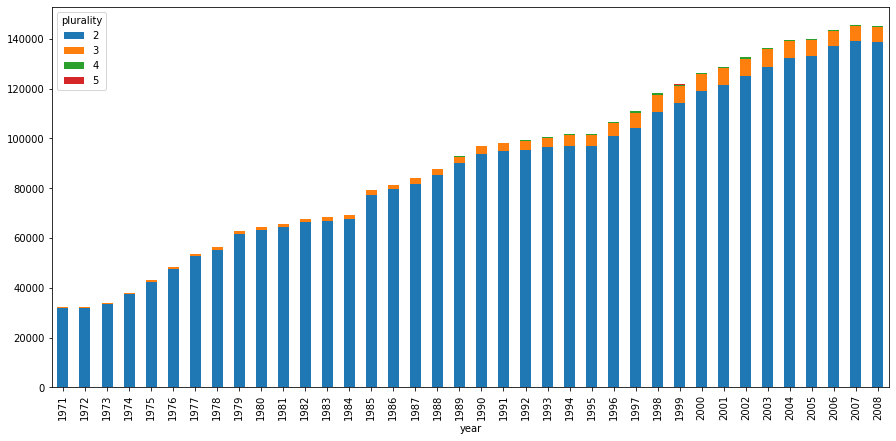

In [7]:
pivot_table = df.pivot(index='year', columns='plurality', values='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(15,7));

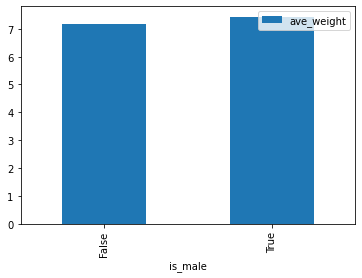

In [8]:
sql = """
  SELECT
    is_male,
    AVG(weight_pounds) AS ave_weight
  FROM
    `bigquery-public-data.samples.natality`
  GROUP BY
    is_male
"""
df = client.query(sql).to_dataframe()
df.plot(x='is_male', y='ave_weight', kind='bar');

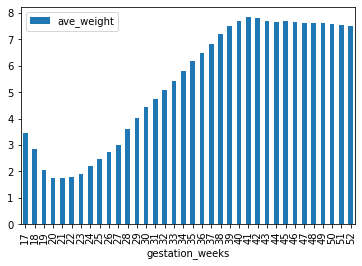

In [9]:
sql = """
  SELECT
    gestation_weeks,
    AVG(weight_pounds) AS ave_weight
  FROM
    `bigquery-public-data.samples.natality`
  WHERE
    NOT IS_NAN(gestation_weeks) AND gestation_weeks <> 99
  GROUP BY
    gestation_weeks
  ORDER BY
    gestation_weeks
"""
df = client.query(sql).to_dataframe()
df.plot(x='gestation_weeks', y='ave_weight', kind='bar');